# Sentiment

Visualize sentiment analysis

In [1]:
import datetime
import os
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython.display import clear_output

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
DATASOURCE = "twitter"
DATADIRECTORYALL = f"../data/{DATASOURCE}/sentiment/" # was "../data/nunl/sentiment/" # was "../data/sentiment/pattern/"
#DATADIRECTORYRIVM = "../data/sentiment/rivm-pattern/"
DATADIRECTORYTEXT = f"../data/{DATASOURCE}/text/"
SENTIMENT = "sentiment"
COUNT = "count"
DATA = "data"
LABEL = "label"
HIGHLIGHT = "highlight"
HIGHLIGHTLABEL = "highlightlabel"
TEXT ="text"
IDSTR = "id_str"

In [4]:
def squeal(text=None):
    clear_output(wait=True)
    if not text is None: print(text)

## Read hourly sentiment analysis by pattern's sentiment analysis

In [5]:
DEFAULTFILEPATTERN = "2.*z"

def getSentimentPerHour(dataDirectory,filePattern=DEFAULTFILEPATTERN):
    fileList = sorted(os.listdir(dataDirectory))
    sentimentPerHour = {}
    for inFileName in fileList:
        if re.search(filePattern,inFileName):
            if re.search(r"-00.out.gz",inFileName): squeal(inFileName)
            try: df = pd.read_csv(dataDirectory+inFileName,compression="gzip",header=None)
            except: continue
            sentiment = sum(df[1])/len(df)
            hour = inFileName[0:11]
            sentimentPerHour[hour] = { SENTIMENT:sentiment, COUNT:len(df) }
    sentimentPerHour = {key:sentimentPerHour[key] for key in sorted(sentimentPerHour.keys())}
    return(sentimentPerHour)

## Convert hourly analysis to day scores

In [6]:
def makeSentimentPerDay(sentimentPerHour):
    sentimentPerDay = {}
    for hour in sentimentPerHour:
        day = re.sub("..$","12",hour)
        if not day in sentimentPerDay: sentimentPerDay[day] = {SENTIMENT:0,COUNT:0}
        sentimentPerDay[day][SENTIMENT] += sentimentPerHour[hour][SENTIMENT]*sentimentPerHour[hour][COUNT]
        sentimentPerDay[day][COUNT] += sentimentPerHour[hour][COUNT]
    for day in sentimentPerDay:
        sentimentPerDay[day][SENTIMENT] /= sentimentPerDay[day][COUNT]
    return(sentimentPerDay)

## Visualize

In [93]:
DATEFORMATHOUR = "%Y%m%d-%H"
DATEFORMATMONTH = "%-d/%-m"
DATEFORMATHRSMINS = "%H:%M"
DEFAULTTITLE = "Polarity scores of Dutch tweets over time"
PLOTFILENAME = "sentiment-all.png"
ANNOTATE = "annotate"

def stringToDate(dateString):
    return(datetime.datetime.strptime(dateString,DATEFORMATHOUR))

def visualizeSentiment(dataSources,title=DEFAULTTITLE,dateFormat=DATEFORMATMONTH):
    font = {"size":16}
    matplotlib.rc("font",**font)
    fig,ax = plt.subplots(figsize=(6,6))
    plt.ylim(-0.14,0.16)
    ax.xaxis.set_major_formatter(mdates.DateFormatter(dateFormat))
    for i in range(0,len(dataSources)):
        data = dataSources[i][DATA]
        label = dataSources[i][LABEL]
        lineData = ax.plot_date([stringToDate(key) for key in data if data[key][COUNT] > 1],\
                     [data[key][SENTIMENT] for key in data if data[key][COUNT] > 1],xdate=True,fmt="-",label=label)
        if HIGHLIGHT in dataSources[i]:
            highlight = dataSources[i][HIGHLIGHT]
            color = lineData[-1].get_color()
            if not HIGHLIGHTLABEL in dataSources[i]:
                ax.plot_date([stringToDate(key) for key in highlight],
                             [data[key][SENTIMENT] for key in highlight],\
                             fmt="o",color=color)
            else:
                highlightlabel = dataSources[i][HIGHLIGHTLABEL]
                ax.plot_date([stringToDate(key) for key in highlight],
                             [data[key][SENTIMENT] for key in highlight],\
                             fmt="o",color=color,label=highlightlabel)
        if ANNOTATE in dataSources[i]:
            for date1,date2,text in dataSources[i][ANNOTATE]:
                plt.annotate(text,(stringToDate(date2),data[date1][SENTIMENT]),color=color)
    plt.title(title)
    plt.legend(framealpha=0.2)
    plt.savefig(PLOTFILENAME)
    plt.show()
    return(ax)

## Process data obtained from all Dutch tweets

In [8]:
highlight = ["20200301-12","20200309-12",\
             "20200312-12","20200315-12","20200317-12","20200319-12","20200323-12","20200331-12","20200407-12",\
             "20200415-12","20200421-12","20200429-12","20200506-12","20200513-12","20200519-12","20200527-12",\
             "20200603-12","20200624-12","20200722-12"]

In [9]:
annotate = [("20200220-12","20200221-12","(1)"),\
            ("20200302-12","20200303-12","(2)"),\
            ("20200312-12","20200313-12","(3)"),\
            ("20200322-12","20200323-12","(4)"),\
            ("20200330-12","20200331-12","(5)"),\
            ("20200413-12","20200414-12","(6)"),\
            ("20200421-12","20200422-12","(7)"),\
            ("20200428-12","20200429-12","(8)"),\
            ("20200430-12","20200501-12","(9)"),\
            ("20200511-12","20200512-12","(10)"),\
            ("20200526-12","20200527-12","(11)"),\
            ("20200601-12","20200603-12","(12)"),\
            ("20200608-12","20200609-12","(13)"),\
            ("20200622-12","20200623-12","(14)"),\
            ("20200708-12","20200709-12","(15)")]

In [10]:
sentimentPerHour = getSentimentPerHour(DATADIRECTORYALL)
sentimentPerDay = makeSentimentPerDay(sentimentPerHour)

20200731-00.out.gz


In [12]:
highlight = []

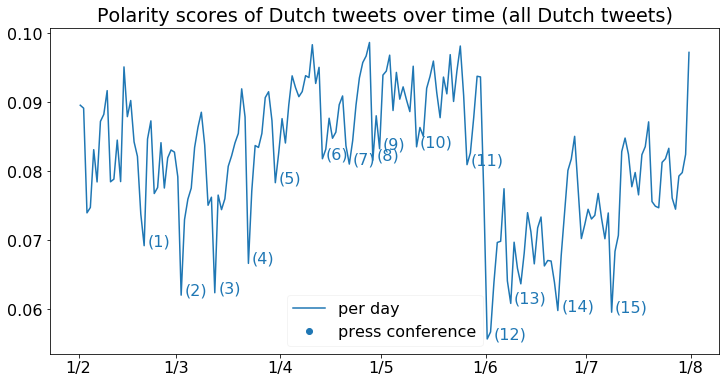

In [13]:
dummy = visualizeSentiment([{DATA:sentimentPerDay,LABEL:"per day",\
                             HIGHLIGHT:highlight,HIGHLIGHTLABEL:"press conference",
                             ANNOTATE:annotate}],\
                           title=DEFAULTTITLE+" (all Dutch tweets)")

1. 20200220 terrorist attack Hanau, Germany
2. 20200302 newsitem: Netherlands financially supporting asylum seekers
3. 20200312 announcement of first national COVID-19 measures
4. 20200322 lack of social distancing in nature areas
5. 20200330 news item: EU donates millions to Morocco
6. 20200413 news item: anti-gay violence
7. 20200421 national press conference on COVID-19
8. 20200428 news item: lack of social distancing at IKEA
9. 20200430 news item: local coalition of CDA and FvD
10. 20200511 news item: etnic profiling by tax services
11. 20200526 news item: KLM boss receives bonus
12. 20200601 lack of social distancing at Amsterdam BLM demonstration
13. 20200608 attacks on left-wing politicians
14. 20200622 racism in tv programme Veronica Inside
15. 20200708 farmers protest

In [14]:
[(hourString,sentimentPerDay[hourString]) \
 for hourString in sorted(sentimentPerDay.keys(),key=lambda h:sentimentPerDay[h][SENTIMENT]) if re.search("202005",hourString)]

[('20200531-12', {'sentiment': 0.07644465284340797, 'count': 560061}),
 ('20200526-12', {'sentiment': 0.08096443627938672, 'count': 604885}),
 ('20200527-12', {'sentiment': 0.08266517291880184, 'count': 604997}),
 ('20200511-12', {'sentiment': 0.0835482176822327, 'count': 591889}),
 ('20200513-12', {'sentiment': 0.08506843269484757, 'count': 601941}),
 ('20200512-12', {'sentiment': 0.08634890023702736, 'count': 584005}),
 ('20200518-12', {'sentiment': 0.08776539095156614, 'count': 549430}),
 ('20200528-12', {'sentiment': 0.08783135182003372, 'count': 599432}),
 ('20200509-12', {'sentiment': 0.08864826485318134, 'count': 554381}),
 ('20200504-12', {'sentiment': 0.0888066958105333, 'count': 645085}),
 ('20200522-12', {'sentiment': 0.09011685349371894, 'count': 599613}),
 ('20200508-12', {'sentiment': 0.09034856012716203, 'count': 587282}),
 ('20200506-12', {'sentiment': 0.09044996257879563, 'count': 641135}),
 ('20200525-12', {'sentiment': 0.09096552647826259, 'count': 581370}),
 ('20200

## Get sentiment on topics

In [15]:
DATADIRECTORYSENTTOPIC = "../data/sentiment/topic/"

def getSentimentPerHourQuery(dataDirectory,query,filePattern=DEFAULTFILEPATTERN,computeMissing=True,\
                             dataDirectorySentTopic=DATADIRECTORYSENTTOPIC,dataDirectoryText=DATADIRECTORYTEXT):
    fileList = sorted(os.listdir(dataDirectory))
    sentimentPerHour = {}
    for inFileName in fileList:
        if re.search(filePattern,inFileName):
            squeal(inFileName)
            if os.path.exists(dataDirectorySentTopic+inFileName):
                dfSent = pd.read_csv(dataDirectorySentTopic+inFileName,header=None)
                sentiment = sum(dfSent[1])/len(dfSent)
                hour = inFileName[0:11]
                sentimentPerHour[hour] = { SENTIMENT:sentiment, COUNT:len(dfSent) }
            elif computeMissing:
                pd.DataFrame([{0:1}]).T.to_csv(dataDirectorySentTopic+inFileName,header=None,index="0")
                try:
                    dfSent = pd.read_csv(dataDirectory+inFileName,header=None)
                    dfText = pd.read_csv(dataDirectoryText+inFileName)
                except: continue
                dictSent = {dfSent.iloc[i][0]:dfSent.iloc[i][1] for i in range(0,len(dfSent))}
                sentScores = {}
                for i in range(0,len(dfText)):
                    if re.search(query,dfText.iloc[i][TEXT],flags=re.IGNORECASE):
                        try:
                            idStr = dfText.iloc[i][IDSTR]
                            sentScore = dictSent[idStr] 
                            sentScores[idStr] = sentScore
                        except: pass
                if len(sentScores) > 0:
                    pd.DataFrame([sentScores]).T.to_csv(dataDirectorySentTopic+inFileName,header=None,index="0")
                    sentiment = sum(sentScores.values())/len(sentScores)
                    hour = inFileName[0:11]
                    sentimentPerHour[hour] = { SENTIMENT:sentiment, COUNT:len(sentScores) }
                else:
                    os.unlink(dataDirectorySentTopic+inFileName)
    sentimentPerHour = {key:sentimentPerHour[key] for key in sorted(sentimentPerHour.keys())}
    return(sentimentPerHour)

In [16]:
QUERYTOPIC = "corona|covid|mondkapje|rivm|blijfthuis|houvol|huisarts|flattenthecurve"

sentimentPerHourTopic = getSentimentPerHourQuery(DATADIRECTORYALL,QUERYTOPIC,filePattern="20200[2-7]",\
                                                 dataDirectorySentTopic=f"../data/{DATASOURCE}/sentiment-topic/",\
                                                 dataDirectoryText=DATADIRECTORYTEXT)

20200731-23.out.gz


In [42]:
QUERYTOPIC = "mondkapje"

sentimentPerHourMondkapje = getSentimentPerHourQuery(DATADIRECTORYALL,QUERYTOPIC,filePattern="20200[2-7]",\
                                                     dataDirectorySentTopic=f"../data/{DATASOURCE}/sentiment-mondkapje/",\
                                                     dataDirectoryText=DATADIRECTORYTEXT,computeMissing=False)

20200731-23.out.gz


In [18]:
QUERYTOPIC = "1[.,]5[ -]*m|afstand.*hou|hou.*afstand|anderhalve[ -]*meter"

sentimentPerHourDistance = getSentimentPerHourQuery(DATADIRECTORYALL,QUERYTOPIC,filePattern="20200[2-7]",\
                                                    dataDirectorySentTopic=f"../data/{DATASOURCE}/sentiment-distance/",\
                                                    dataDirectoryText=DATADIRECTORYTEXT,computeMissing=False)

20200731-23.out.gz


In [85]:
sentimentPerDayMondkapje = makeSentimentPerDay(sentimentPerHourMondkapje)
sentimentPerDayDistance = makeSentimentPerDay(sentimentPerHourDistance)
sentimentPerDayTopic = makeSentimentPerDay(sentimentPerHourTopic)

In [86]:
FIRSTCOVIDDAY = "20200312-12"

sentimentPerDayMondkapje = {key:sentimentPerDayMondkapje[key] for key in sentimentPerDayMondkapje.keys() if key >= FIRSTCOVIDDAY}
sentimentPerDayDistance = {key:sentimentPerDayDistance[key] for key in sentimentPerDayDistance.keys() if key >= FIRSTCOVIDDAY}

In [87]:
len(sentimentPerDayMondkapje),len(sentimentPerDayDistance)

(142, 142)

### General graphs

In [33]:
annotateTopic = [("20200215-12","20200216-12","(A)"),
                 ("20200223-12","20200224-12","(B)"),
                 ("20200308-12","20200309-12","(C)"),
                 ("20200322-12","20200323-12","(D)"),
                 ("20200411-12","20200412-12","(E)"),
                 ("20200420-12","20200421-12","(F)"),
                 ("20200426-12","20200427-12","(G)"),
                 ("20200510-12","20200511-12","(H)"),
                 ("20200519-12","20200520-12","(I)"),
                 ("20200523-12","20200524-12","(J)"),
                 ("20200527-12","20200528-12","(K)"),
                 ("20200601-12","20200602-12","(L)"),
                 ("20200621-12","20200622-12","(M)"),
                 ("20200712-12","20200713-12","(N)"),
                 ("20200716-12","20200717-12","(O)")]

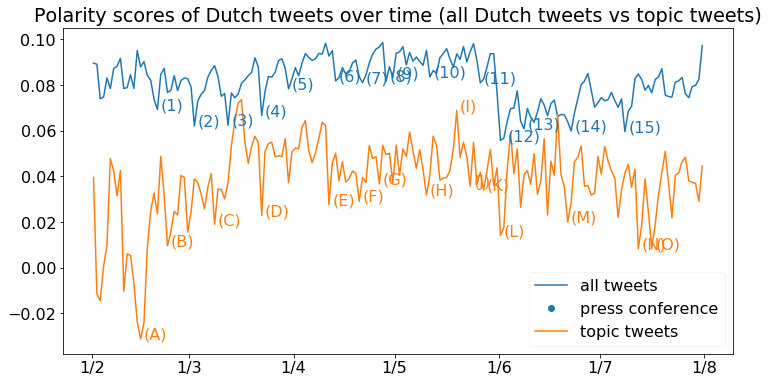

In [34]:
dummy = visualizeSentiment([{DATA:sentimentPerDay,LABEL:"all tweets",
                             HIGHLIGHT:highlight,HIGHLIGHTLABEL:"press conference",ANNOTATE:annotate},
                            {DATA:sentimentPerDayTopic,LABEL:"topic tweets",HIGHLIGHT:highlight,ANNOTATE:annotateTopic}],
                           title=DEFAULTTITLE+" (all Dutch tweets vs topic tweets)")

A. 20200215 COVID-19 death on Dutch cruiseship
B. 20200223 Italy outbreak
C. 20200308 news item: COVID-19 spreading in Europe
D. 20200322 news item: lack of social distancing in nature areas
E. 20200411 news item: Netherlands sent facemasks to China
F. 20200420 anti-climate protest on Twitter
G. 20200426 nurse complains about corona measurements non-compliance
H. 20200510 warnings about staying alert
I. 20200519 relaxation of COVID-19 measures announced
J. 20200523 critique on national head of intensive care
K. 20200527 news item: politician rejects EU's COVID-19 measures
L. 20200601 lack of social distancing at Amsterdam BLM demonstration
M. 20200621 The Hague demonstration cancelled for social distancing
N. 20200712 news item: facemask related murder in France
O. 20200716 discussion about initial health care worker safety

In [ ]:
annotatePaper = [("20200312-12","20200313-12","(A)"),
                 ("20200519-12","20200520-12","(B)")]

dummy = visualizeSentiment([{DATA:sentimentPerDay,LABEL:"all tweets",
                             HIGHLIGHT:[],HIGHLIGHTLABEL:"",ANNOTATE:[]},
                            {DATA:sentimentPerDayTopic,LABEL:"topic tweets",HIGHLIGHT:[],
                             ANNOTATE:annotatePaper}],
                           title=DEFAULTTITLE+" (all Dutch tweets vs topic tweets)")

In [ ]:
[(d,sentimentPerDay[d][SENTIMENT],sentimentPerDayTopic[d][SENTIMENT]) for d in sentimentPerDayTopic \
 if sentimentPerDayTopic[d][SENTIMENT] > sentimentPerDay[d][SENTIMENT]]

In [ ]:
[(hourString,sentimentPerDayTopic[hourString]) \
 for hourString in sorted(sentimentPerDayTopic.keys(),key=lambda h:sentimentPerDayTopic[h][SENTIMENT]) if re.search("202003",hourString)]

### Two per-topic graphs

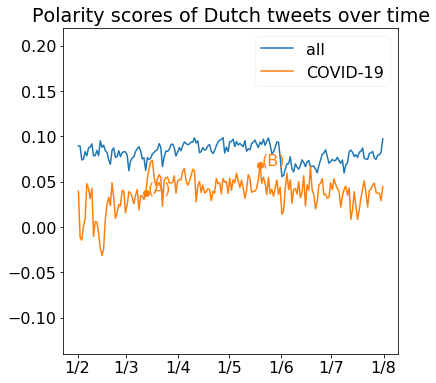

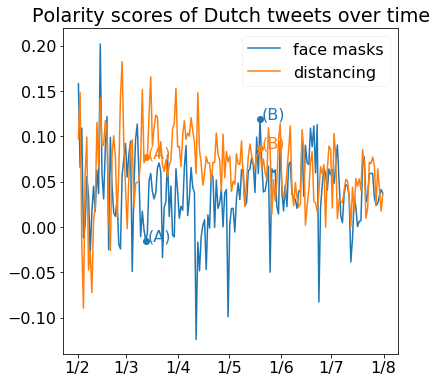

In [67]:
highlightPaper = ["20200312-12","20200519-12"]
annotatePaper = [("20200312-12","20200313-12","(A)"),
                 ("20200519-12","20200520-12","(B)")]

dummy = visualizeSentiment([
            {DATA:sentimentPerDay,LABEL:"all",HIGHLIGHT:[],HIGHLIGHTLABEL:"",ANNOTATE:[]},
            {DATA:sentimentPerDayTopic,LABEL:"COVID-19",HIGHLIGHT:highlightPaper,HIGHLIGHTLABEL:"",ANNOTATE:annotatePaper}],
            title=DEFAULTTITLE)
dummy = visualizeSentiment([
            {DATA:sentimentPerDayMondkapje,LABEL:"face masks",HIGHLIGHT:highlightPaper,HIGHLIGHTLABEL:"",ANNOTATE:annotatePaper},
            {DATA:sentimentPerDayDistance,LABEL:"distancing",HIGHLIGHT:highlightPaper,HIGHLIGHTLABEL:"",ANNOTATE:annotatePaper}],
            title=DEFAULTTITLE)

In [96]:
def movingAverage(numberList,size):
    newList = []
    for i in range(0,len(numberList)):
        numberUsed = 1
        newList.append(numberList[i])
        for j in range(1,size):
            if i-j >= 0:
                newList[i] += numberList[i-j]
                numberUsed += 1
        newList[i] /= numberUsed
    return(newList)

### Two plots in one figure

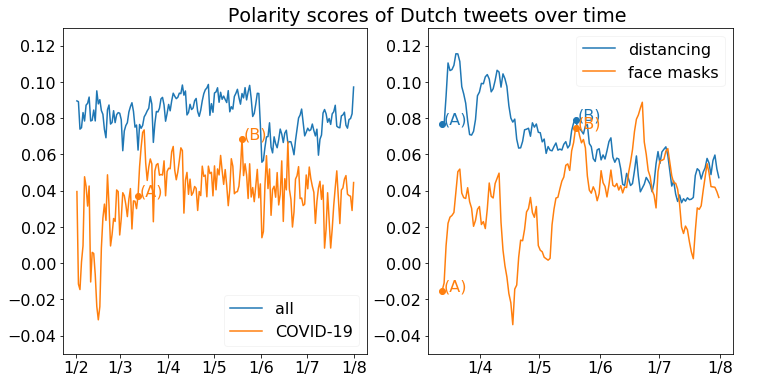

In [107]:
dateFormat = DATEFORMATMONTH
dataSources = [{DATA:sentimentPerDay,LABEL:"all",HIGHLIGHT:[],HIGHLIGHTLABEL:"",ANNOTATE:[]},
               {DATA:sentimentPerDayTopic,LABEL:"COVID-19",HIGHLIGHT:highlightPaper,HIGHLIGHTLABEL:"",ANNOTATE:annotatePaper}]
title = DEFAULTTITLE

if True:
    font = {"size":16}
    matplotlib.rc("font",**font)
    fig,ax = plt.subplots(figsize=(12,6))
    ax = plt.subplot(121)
    plt.ylim(-0.05,0.13) # was -0.14,0.18
    ax.xaxis.set_major_formatter(mdates.DateFormatter(dateFormat))
    for i in range(0,len(dataSources)):
        data = dataSources[i][DATA]
        label = dataSources[i][LABEL]
        lineData = ax.plot_date([stringToDate(key) for key in data if data[key][COUNT] > 1],\
                     [data[key][SENTIMENT] for key in data if data[key][COUNT] > 1],xdate=True,fmt="-",label=label)
        if HIGHLIGHT in dataSources[i]:
            highlight = dataSources[i][HIGHLIGHT]
            color = lineData[-1].get_color()
            if not HIGHLIGHTLABEL in dataSources[i]:
                ax.plot_date([stringToDate(key) for key in highlight],
                             [data[key][SENTIMENT] for key in highlight],\
                             fmt="o",color=color)
            else:
                highlightlabel = dataSources[i][HIGHLIGHTLABEL]
                ax.plot_date([stringToDate(key) for key in highlight],
                             [data[key][SENTIMENT] for key in highlight],\
                             fmt="o",color=color,label=highlightlabel)
        if ANNOTATE in dataSources[i]:
            for date1,date2,text in dataSources[i][ANNOTATE]:
                plt.annotate(text,(stringToDate(date2),data[date1][SENTIMENT]),color=color)
    plt.title("                               Polarity scores of")
    plt.legend(framealpha=0.2)

dataSources = [{DATA:sentimentPerDayDistance,LABEL:"distancing",HIGHLIGHT:highlightPaper,HIGHLIGHTLABEL:"",ANNOTATE:annotatePaper},
              {DATA:sentimentPerDayMondkapje,LABEL:"face masks",HIGHLIGHT:highlightPaper,HIGHLIGHTLABEL:"",ANNOTATE:annotatePaper}]

if True:
    ax = plt.subplot(122)
    plt.ylim(-0.05,0.13)
    ax.xaxis.set_major_formatter(mdates.DateFormatter(dateFormat))
    for i in range(0,len(dataSources)):
        data = dataSources[i][DATA]
        label = dataSources[i][LABEL]
        x = [key for key in data if data[key][COUNT] > 1]
        y = movingAverage([data[key][SENTIMENT] for key in data if data[key][COUNT] > 1],7)
        lineData = ax.plot_date([stringToDate(key) for key in x],y,xdate=True,fmt="-",label=label)
        plottedData = {x[i]:y[i] for i in range(0,len(x))}
        if HIGHLIGHT in dataSources[i]:
            highlight = dataSources[i][HIGHLIGHT]
            color = lineData[-1].get_color()
            if not HIGHLIGHTLABEL in dataSources[i]:
                ax.plot_date([stringToDate(key) for key in highlight],
                             [plottedData[key] for key in highlight],\
                             fmt="o",color=color)
            else:
                highlightlabel = dataSources[i][HIGHLIGHTLABEL]
                ax.plot_date([stringToDate(key) for key in highlight],
                             [plottedData[key] for key in highlight],\
                             fmt="o",color=color,label=highlightlabel)
        if ANNOTATE in dataSources[i]:
            for date1,date2,text in dataSources[i][ANNOTATE]:
                plt.annotate(text,(stringToDate(date2),plottedData[date1]),color=color)
    plt.title("Dutch tweets over time                      ")
    plt.legend(framealpha=0.2)
    plt.savefig(PLOTFILENAME)
    plt.show()

In [ ]:
def averageSentiment(sentimentPerDay):
    sentiment = 0.0
    count = 0
    for date in sentimentPerDay.keys():
        sentiment += sentimentPerDay[date][SENTIMENT]*sentimentPerDay[date][COUNT]
        count += sentimentPerDay[date][COUNT]
    return(sentiment/count)

print(averageSentiment(sentimentPerDayMondkapje),averageSentiment(sentimentPerDayDistance))

Average sentiment scores:
1. Twitter: face masks: 0.032; distancing: 0,066
2. Nu.nl: face masks: 0.055; distancing: 0.056
3. Reddit: face masks: 0.050; distancing: 0.068

## Show positive tweets

In [ ]:
def showTweetTextWithSentiment(dataDir,query,filePattern=DEFAULTFILEPATTERN):
    fileList = sorted(os.listdir(dataDir))
    tweetSentPairs = []
    for inFileName in fileList:
        if re.search(filePattern,inFileName):
            squeal(inFileName)
            if os.path.exists(dataDir+inFileName):
                dfSent = pd.read_csv(dataDir+inFileName,header=None,index_col=0)
                dfText = pd.read_csv(DATADIRECTORYTEXT+inFileName,index_col=IDSTR)
                selectedDict = {idStr:dfText.loc[idStr][TEXT] for idStr in dfText.index if re.search(query,dfText.loc[idStr][TEXT],flags=re.IGNORECASE)}
                for idStr in selectedDict.keys():
                    try:
                        tweetSentPairs.append((dfSent.loc[idStr][1],selectedDict[idStr]))
                    except: pass
    tweetSentPairs = sorted(tweetSentPairs,key=lambda e:e[0],reverse=True)
    return(tweetSentPairs)

tweetSentPairs = showTweetTextWithSentiment(DATADIRECTORYSENTTOPIC,query="coronapocalypse",filePattern="20200316")

In [ ]:
tweetSentPairs[0:10]

In [ ]:
sum([tweetSentPairs[i][0] for i in range(0,len(tweetSentPairs))])/len(tweetSentPairs)

## Visualize sentiment of single press conference day

In [ ]:
def convertDate(dateString1,dateString2,dateString3):
    return(re.sub(dateString1,dateString2,dateString3))

In [ ]:
dummy = visualizeSentiment([{DATA:{k:sentimentPerHour[k] for k in sentimentPerHour.keys() \
                                   if re.search(r"^20200312",k)},\
                             LABEL:"20200312",HIGHLIGHT:["20200312-15"],HIGHLIGHTLABEL:"press conference"},\
                            {DATA:{convertDate("20200311","20200312",k):sentimentPerHour[k] for k in sentimentPerHour.keys() 
                                   if re.search(r"^20200311",k)},LABEL:"20200311"},\
                            {DATA:{convertDate("20200313","20200312",k):sentimentPerHour[k] for k in sentimentPerHour.keys() 
                                   if re.search(r"^20200313",k)},LABEL:"20200313"}],\
                           title="Sentiment scores of Dutch tweets on Thursday 12 March 2020",dateFormat=DATEFORMATHRSMINS)

In [ ]:
{DATA:{k:sentimentPerHour[k] for k in sentimentPerHour.keys() if re.search(r"^20200311",k)},LABEL:""}

## Compare day graph with previous years

In [ ]:
DATADIRECTORYALL2019 = "../data/sentiment/2019/"
TEMPERATURESFILE = "../data/temperatures.csv" 

def changeYearTo2020(dataIn):
    dataOut = {}
    for dateString in dataIn:
        dateString2020 = re.sub(r"20[0-9][0-9]","2020",dateString)
        dataOut[dateString2020] = dataIn[dateString]
    return(dataOut)

sentimentPerHour2019 = getSentimentPerHour(DATADIRECTORYALL2019)
sentimentPerDay2019 = makeSentimentPerDay(sentimentPerHour2019)
ax = visualizeSentiment([{DATA:sentimentPerDay,LABEL:"2020 per day",\
                          HIGHLIGHT:highlight,HIGHLIGHTLABEL:"press conference"},\
                         {DATA:changeYearTo2020(sentimentPerDay2019),LABEL:"2019 per day",\
                          HIGHLIGHT:["20200315-12","20200318-12"],HIGHLIGHTLABEL:"terror attack"}],
                         title=DEFAULTTITLE)

## Add daily temperatures to plot

In [ ]:
def readTemperatures():
    temperatures = pd.read_csv(TEMPERATURESFILE,header=None)
    temperatures = { (str(temperatures[0][i])+"-12"):(temperatures[1][i]/10) for i in range(0,len(temperatures))}
    return(temperatures)

temperatures = readTemperatures()

ax2 = ax.twinx()
ax2.set_ylim([-20,40])
dummy = ax2.plot_date([datetime.datetime.strptime(key,DATEFORMATHOUR) for key in temperatures],\
                      [temperatures[key] for key in temperatures],xdate=True,\
                      fmt="--",color="990000",label="temperature")

## Check relation temperature - sentiment

In [ ]:
plt.figure(figsize=(3,3))
plt.gcf().subplots_adjust(left=0.2)
x = [sentimentPerDay[key][SENTIMENT] for key in temperatures]
y = [temperatures[key] for key in temperatures]
plt.scatter(x,y)
plt.show()

In [ ]:
np.corrcoef(x,y)[0][1]

## Check relation sentiment today - yesterday 

In [ ]:
plt.figure(figsize=(3,3))
plt.gcf().subplots_adjust(left=0.2)
x = [sentimentPerDay[key][SENTIMENT] for key in sentimentPerDay]
y = [sentimentPerDay[key][SENTIMENT] for key in sentimentPerDay]
x.pop(-1)
y.pop(0)
plt.scatter(x,y)
plt.show()

In [ ]:
np.corrcoef(x,y)[0][1]

## Sort days by sentiment score

Dates of Dutch government press conferences related to corona crisis:

1. Sunday 1 March 2020: https://www.youtube.com/watch?v=rg9aM97Pu38
2. Monday 9 March 2020: https://www.youtube.com/watch?v=xz-DtYHGdLA
3. Thursday 12 March 2020: https://www.youtube.com/watch?v=0iD1FN6I87Y (start: around 15:15 PM)
4. Sunday 15 March 2020: https://www.youtube.com/watch?v=j94ULn90xg8
5. Tuesday 17 March 2020: https://www.youtube.com/watch?v=KuXj3c1F8WY
6. Thursday 19 March 2020: https://www.youtube.com/watch?v=Yqx0PlSnUFE
7. Monday 23 March 2020: https://www.youtube.com/watch?v=mcpLFX_L9o8
8. Tuesday 31 March 2020: https://www.youtube.com/watch?v=FNuzw3wplow
9. Tuesday 7 April 2020: https://www.youtube.com/watch?v=-j3_mmZcBZU
10. Wednesday 15 April 2020: https://www.youtube.com/watch?v=n1-rSb3j0UM
11. Tuesday 21 April 2020: https://www.youtube.com/watch?v=Yjx7SPtq7Bk
12. Wednesday 29 April 2020: https://www.youtube.com/watch?v=dfhzIGagbOw
13. Wednesday 6 May 2020: https://www.youtube.com/watch?v=rBtDphRcPKA
14. Wednesday 13 May 2020: https://www.youtube.com/watch?v=zISG9KkuAQ0
15. Tuesday 19 May 2020: https://www.youtube.com/watch?v=MlAk_RMTHZU
16. Wednesday 27 May 2020: https://www.youtube.com/watch?v=M0qBpBz_5h8
17. Wednesday 3 June 2020: https://www.youtube.com/watch?v=rsIUKfLjf8k

In [ ]:
{k:round(v[SENTIMENT],4) for k,v in sorted(sentimentPerDay.items(),key=lambda item:item[1][SENTIMENT])}

## Process data from RIVM query

In [ ]:
sentimentPerHour = getSentimentPerHour(DATADIRECTORYRIVM)
sentimentPerDay = makeSentimentPerDay(sentimentPerHour)
visualizeSentiment([{DATA:sentimentPerHour,LABEL:"per hour"},{DATA:sentimentPerDay,LABEL:"per day"}],\
                   title=DEFAULTTITLE+" (RIVM query)")

## Sort days by sentiment score

In [ ]:
{k:v for k,v in sorted(sentimentPerDay.items(),key=lambda item:item[1][SENTIMENT])}

## Examine tweet texts from day with extreme sentiment

In [ ]:
import gzip
import json
import numpy as np
from library import getTweetText

def removeNewlines(text):
    return(re.sub(r"\n",r" ",text))

HOURSPERDAY = 24
DATE = "20200302"
TWEETDIRECTORYRIVM = "../data/rivm/"

tweetTexts = []
for hour in range(0,HOURSPERDAY):
    hour = str(hour).zfill(2)
    inFile = gzip.open(TWEETDIRECTORYRIVM+DATE+"-"+hour+".rivm.gz")
    for line in inFile:
        jsonData = json.loads(line)
        tweetText = removeNewlines(getTweetText(jsonData))
        tweetTexts.append(tweetText)
    inFile.close()
    
pd.DataFrame(tweetTexts)[0].value_counts()[0:20]

## Process sentiment of topic

In [ ]:
def readSentiment(fileName):
    return(pd.read_csv(fileName,index_col="date").T.to_dict())

In [ ]:
DATADIR = "../data/sentiment/"
TOPIC = "corona|covid|flattenthecurve|blijfthuis|rivm|mondkapje|huisarts|houvol"
EXTENSION = ".csv"

# sentimentPerHourTopic = readSentiment(DATADIR+TOPIC+EXTENSION)
sentimentPerHourTopic = getSentiment()

In [ ]:
sentimentPerDayTopic = makeSentimentPerDay(sentimentPerHourTopic)
dummy = visualizeSentiment([{DATA:sentimentPerDay,LABEL:"all",
                            HIGHLIGHT:highlight,HIGHLIGHTLABEL:"press conference"},
                            {DATA:sentimentPerDayTopic,LABEL:"topic",\
                             HIGHLIGHT:highlight,HIGHLIGHTLABEL:"press conference"}],\
                           title=DEFAULTTITLE+" (all Dutch tweets vs topic tweets)")

In [ ]:
for selectedDates in "202002 202003 202004 202005[01]".split():
    nbrOfTweetsAll = sum([sentimentPerDay[date][COUNT] for date in sentimentPerDay if re.search(selectedDates,date)])
    nbrOfTweetsTopic = sum([sentimentPerDayTopic[date][COUNT] for date in sentimentPerDayTopic if re.search(selectedDates,date)])
    print(selectedDates,round(nbrOfTweetsTopic/nbrOfTweetsAll,3))

In [ ]:
sentimentPerDay